# Home Assignment No. 1: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [0]:
### BEGIN Your imports
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
### END Your imports

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [0]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution
    out = arr - arr.mean(axis = 0)
    ### END Solution

    return out

In [3]:
A = np.array([[2,3,4],[5,3,1]])
A

array([[2, 3, 4],
       [5, 3, 1]])

In [4]:
center(A)

array([[-1.5,  0. ,  1.5],
       [ 1.5,  0. , -1.5]])

## Task 2. Numpy Problem 2 (1 point)

Plot the **Butterfly Curve** given by the following equation:
$$x(t)=\sin(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
$$y(t)=\cos(t)\cdot\big[e^{\cos(t)}-2\cos(4t)-\sin^{5}(\frac{t}{12})\big]$$
for $0\leq t\leq 12\pi$. Make sure that all the folds of the wings of different levels have different color.

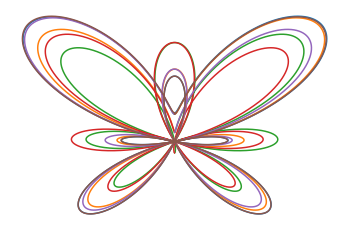

In [6]:
### BEGIN Solution
def x_(t):
  return np.sin(t)*(np.exp(np.cos(t)) - 2*np.cos(4*t) - np.sin(t/12)**5)
def y_(t):  
  return np.cos(t)*(np.exp(np.cos(t)) - 2*np.cos(4*t) - np.sin(t/12)**5)
  
u =  np.arange(0, 12*np.pi,2*np.pi)
t_ = 1e-3
for t in u:
  plt.plot(x_(np.arange(t,t+2*np.pi,t_)),
          y_(np.arange(t,t+2*np.pi,t_)))       
plt.axis('off');
### END Solution

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

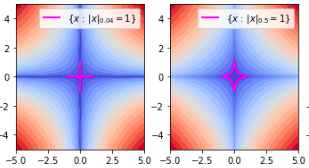

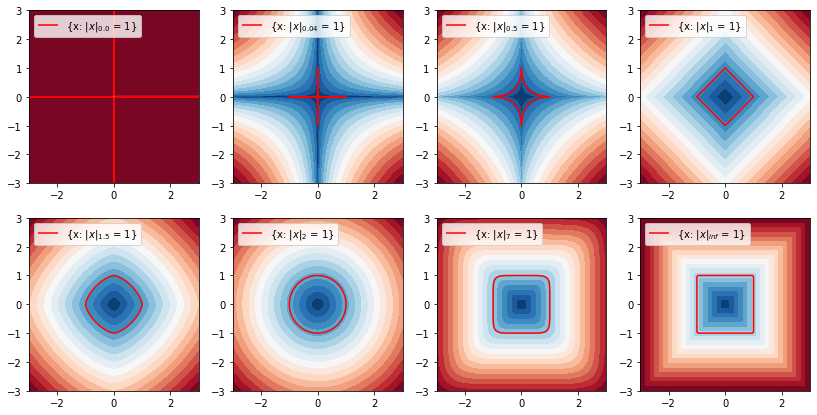

In [8]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))


fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    ys = yy.shape[0]     
    y_s = yy.shape[1]
    x_f = xx.ravel()     #Flatten out "xx" and "yy" values
    y_f = yy.ravel()
    matx = np.vstack((x_f,y_f)).T
    l = []               #initialize norm list
    for i in matx:
        l.append(np.linalg.norm(i,p))
    l = np.array(l)
    l = l.reshape((ys, y_s))
    l_arry = np.linspace(l.min(), l.max(), 20)
    p1 = ax.contourf(xx, yy, l, levels = l_arry,cmap=plt.cm.RdBu_r)
    p2 = ax.contour(xx, yy, l,levels=[1], colors = 'r')
    ax.legend([p2.collections[0]], [r"{x: $|x|_{"+str(p)+"}$ = 1}"], loc="upper left")
    ### END Solution

plt.show()

## Task 4. Decision Rules and Feature Engeneering (1+1=2 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [0]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

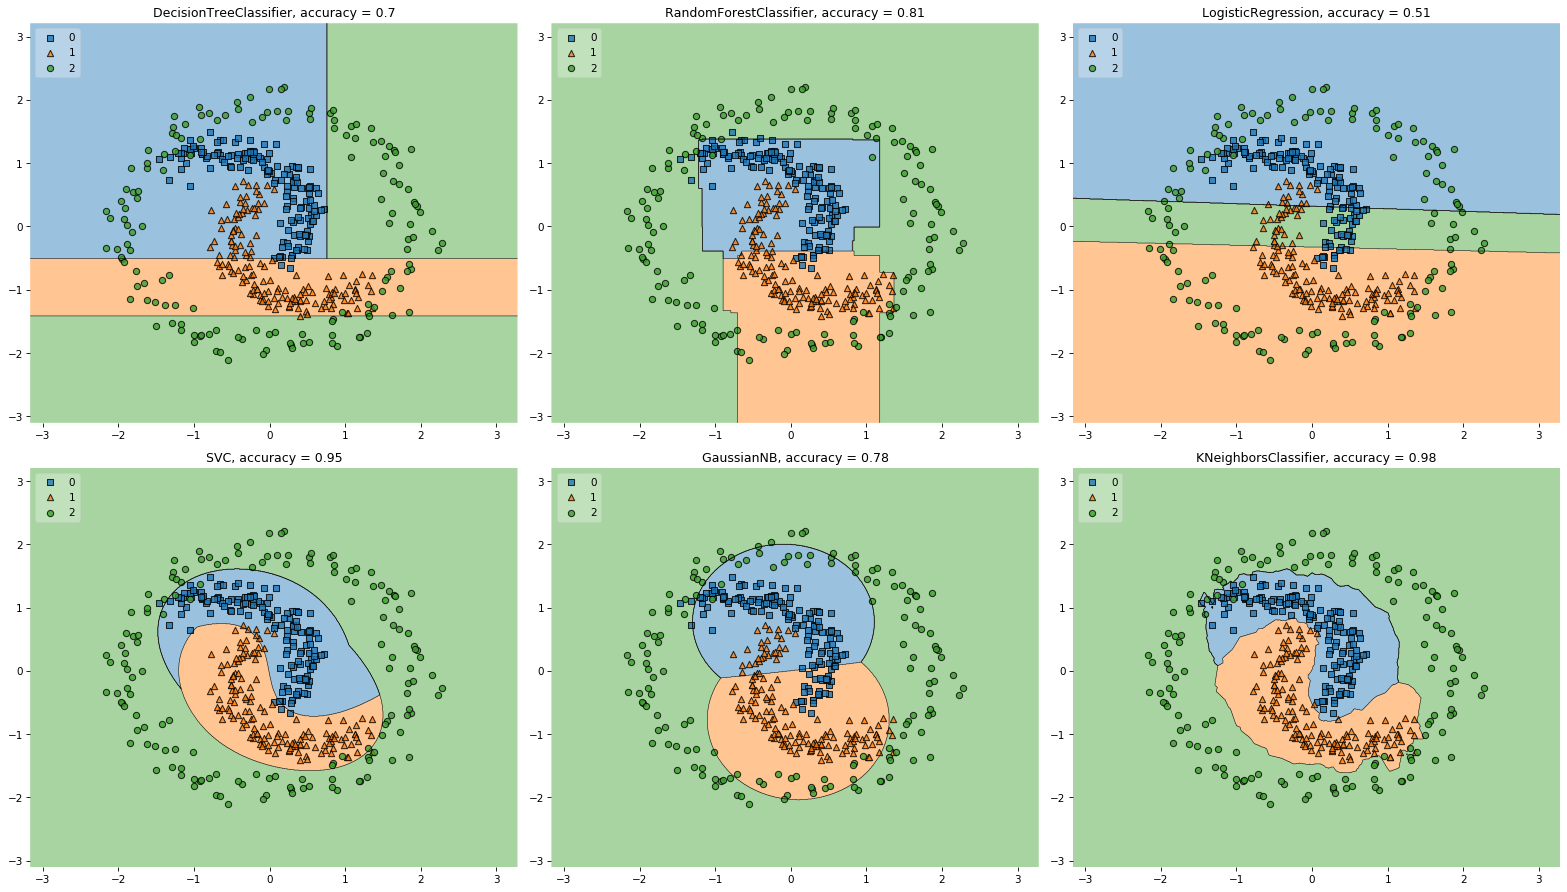

In [19]:
### BEGIN Solution
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
rs = 42
DT = DecisionTreeClassifier(max_depth=2,random_state=rs)
RF = RandomForestClassifier(max_depth=2,n_estimators=20,random_state=rs)
LR = LogisticRegression(random_state=rs)
SVC = SVC(kernel='rbf',random_state=rs)
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=3)
classifiers = [DT,RF,LR,SVC,NB,KNN]
n = len(classifiers)
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(21,12),dpi=75)

for c, ax in zip(classifiers, axes.flat):
    c.fit(X, y) 
    # Plot decision regions
    plot_decision_regions(X=X, y=y, clf=c, legend=2,ax=ax)
    ax.set_title('{0}, accuracy = {1}'.format(c.__class__.__name__,np.round(c.score(X,y),2)))

        
fig.tight_layout()
### END Solution



### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering (1 of 2 points)
In previous task 4.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


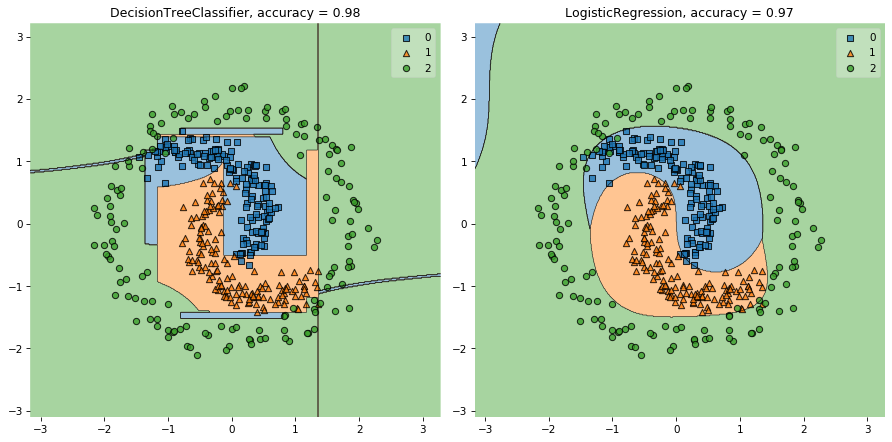

In [20]:
### BEGIN Solution
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
DT = DecisionTreeClassifier(max_depth=5,random_state=rs)
LR = LogisticRegression(random_state=rs)
new_classifiers =[DT,LR]
labels = ['DecisionTreeClassifier', 'LogisticRegression']
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(12,6),dpi=75)
for c, l, ax in zip(new_classifiers, labels, axes.flat):
    p_p = make_pipeline(PolynomialFeatures(degree=5),c)
    p_p.fit(X, y)
    score = p_p.score(X, y)
    fig = plot_decision_regions(X=X, y=y, clf=p_p, ax=ax)
    ax.set_title(r'{}, accuracy = {}'.format(l, np.round(score,2)))
    
plt.tight_layout()
### END Solution

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [29]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class',axis=1),data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
686,x,o,x,b,o,x,b,o,b,False
938,b,b,o,x,o,b,o,x,x,False
6,x,x,x,x,o,b,o,o,b,True


In [30]:
data.columns

Index(['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'], dtype='object')

The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [31]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
50,1,1,1,0,1,-1,-1,-1,0
253,1,0,-1,1,-1,0,1,0,0
738,1,0,0,-1,-1,-1,0,1,1
910,0,1,0,-1,-1,-1,1,1,0


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

#naming X_train and y_train, to be used through out the task
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

#naming X_test and y_test, to be used through out the task
y_test = y.iloc[test_idx]
X_test = X.iloc[test_idx]

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(308, 9) (308,)
(650, 9) (650,)


Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [33]:
from sklearn.svm import SVC
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)


for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on train set for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method. **Report** the validation accuracy score, test accuracy score and best found hyper parameters. **Explain** the results: does your model overfit?

In [34]:
### BEGIN Solution
from sklearn.model_selection import GridSearchCV
params = [{'gamma': [1e-2, 1e-3, 1e-4,1e-5],
               'C': [10,100, 500,1000],
           'kernel': ['rbf','linear']}]

clf_svm = GridSearchCV(SVC(random_state = 42),
                    params, n_jobs=-1, 
                    error_score='accuracy_score',
                    cv = 5)
clf_svm.fit(X_train, y_train)
cv_score = clf_svm.best_score_
test_score = accuracy_score(y_test, clf_svm.predict(X_test))
print('Best parameters: ', clf_svm.best_params_)
print('SVM score on CV: ', clf_svm.best_score_)
print('SVM score on Test: ', test_score)
### END Solution

Best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
SVM score on CV:  0.980327868852459
SVM score on Test:  0.9846153846153847


- Explaination of result:

- From the result above; It is shown that the model does not overfit. 

- This is because the Model performance on the test data sample is high 

- (even slightly better than performance on the train_set) 

### Subproblem 5.2. Feature engeneering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest with parameters from the example in order to achieve 5-fold validation score on train set not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [35]:
### BEGIN Solution
clf_rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)

#feature engineering process...
new_feature = np.sum(X,axis =1)
new_X = pd.concat([X,new_feature],axis= 1,sort=True)

#spliting new features into train and test-sets
X_newtr = new_X.iloc[train_idx]
X_newts = new_X.iloc[test_idx]

#5-fold validation on "tranining set"
print('Validation score: ', cross_val_score(clf_rf, X_newtr, y_train, cv=5).mean()) 

#fitting the model on the whole train set
clf_rf.fit(X_newtr, y_train)

#testing result on test set
test_scr = accuracy_score(y_test, clf_rf.predict(X_newts))
print(' score on Test: ', test_scr)
### END Solution

Validation score:  0.9738762559492333
 score on Test:  0.9846153846153847


- The new feature generated is the sum of all the cells in the game

- As earlier stated, the players take turns in making marks

- If we have a determing feature which adds corresponding numbers of marks made. 

- Then through the last turn (and correspondingly win), the feature will stop on any number from (-1, 1). 

- This feature will correlate with a game result as ~1.0.

## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [36]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
317,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56.0,44.14
546,333.0,0.0,0.0,192.0,0.0,931.2,842.6,28.0,31.97
811,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28.0,27.92


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

In [0]:
### BEGIN Solution
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RandomF = RandomForestRegressor(random_state=42)
ExtraT = ExtraTreesRegressor(random_state=42)


parm = [{'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)],
              'max_depth':[int(x) for x in np.linspace(1, 20, num = 20)],
              'max_features':[1,2,3,4,5,6,7,8]}]

#GridSearch_CV for "Random Forest".....
RandomF = GridSearchCV(RandomF, parm, cv=5, n_jobs = -1, scoring='neg_mean_squared_error')
RandomF.fit(X_train, y_train)
Train_pred_RF= RandomF.best_estimator_.predict(X_train)
Test_pred_RF = RandomF.best_estimator_.predict(X_test)

Train_RF_mse  = mean_squared_error(y_train, Train_pred_RF)
RF_vl_     =  abs(RandomF.best_score_)
Test_RF_mse =  mean_squared_error(y_test, Test_pred_RF)

In [0]:
print(Train_RF_mse)
print(RF_vl_)
print(Test_RF_mse)

5.347382938789564
27.08371398618121
26.96017589186973


In [0]:
#Grid SearchCV for ExtraTree....
ExtraT = GridSearchCV(ExtraT, parm, cv=5, scoring='neg_mean_squared_error')
ExtraT.fit(X_train, y_train)
Train_pred_ET = ExtraT.best_estimator_.predict(X_train)
Test_pred_ET = ExtraT.best_estimator_.predict(X_test)

Train_ET_mse  = mean_squared_error(y_train,Train_pred_ET)
ET_vl_     =  abs(ExtraT.best_score_)
Test_ET_mse  =  mean_squared_error(y_test, Test_pred_ET)

In [0]:
print(Train_ET_mse)
print(ET_vl_)
print(Test_ET_mse)

1.350858224609529
24.1324918206752
20.780569850286607


In [0]:
result_df = pd.DataFrame(([Train_RF_mse, RF_vl_, Test_RF_mse], [Train_ET_mse, ET_vl_, Test_ET_mse]),
                         index=['RandomForestRegressor','ExtraTreesRegressor'], 
                             columns=['Train', 'Valid','Test'])
result_df.index.name = 'Regressors'                   
result_df                    
      
### END Solution

,Train,Valid,Test
Regressors,,,
RandomForestRegressor,5.347383,27.083714,26.960176
ExtraTreesRegressor,1.350858,24.132492,20.780570


-  Explaination of Result:

- The main parameters to be tuned for these algorithms are; number of estimators (trees) and maximum depth of each tree. 




- Explanation for difference in scores for train and valid/test: 


- Most important parameters for both algorithms are number of trees in ensemble (n_estimators) and the maximum depth of each tree (max_depth).

- The train score is the lowest one, this is related to the fact thar the regressors are being trained on this data samples, and the error on these set is the lowest compared to that of "test/validation" set.


- The  ExtraTrees and RandomForest have  quite similar accuracy perfomance in case of large amount of relevant features, but in case of irrelevant features and noisy data ExtraTreesRegressor works better. 

-  Also, the  Extratree works better than RandomForest because feature selection by algorithms is near optimal.

## Task 7. Multi-Class Classification Strategies (2 points)
In this task, you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [38]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.0,0.06,1
165,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.0,0.00,5
101,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.0,0.00,2


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [0]:
### BEGIN Solution
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from time import time
import time as ty


clfs = [DecisionTreeClassifier(max_depth=7),
        RandomForestClassifier(n_estimators=100, max_depth=3),
        KNeighborsClassifier(n_neighbors=5),
        LogisticRegression()]

#Prepare output
N = ['Multiclass', 'OneVsRest', 'OneVsOne']
M = ['Decision Tree','Random Forest','K Nearest Neighbors','Logistic']
n = len(N)
m = len(M)
T = pd.DataFrame(np.ones([n,m]),index = N,columns=M)
S = pd.DataFrame(np.ones([n,m]),index = N, columns=M)
for i in range(3):   
  for c, j in zip(clfs, range(4)):
    if i==0:
      approach = c
    elif i==1:
      approach = OneVsRestClassifier(c)
    elif i==2:
      approach = OneVsOneClassifier(c)   
    start_ = ty.perf_counter()
    score = cross_val_score(approach, X, y, cv=5, scoring='f1_micro').mean() 
    elsap_ = ty.perf_counter()
    T.iloc[i,j] = (elsap_ - start_)
    S.iloc[i,j] = score;

In [40]:
print('Sores : Cross validation')
display(S)

Sores : Cross validation


,Decision Tree,Random Forest,K Nearest Neighbors,Logistic
Multiclass,0.588704,0.589037,0.612625,0.584164
OneVsRest,0.551606,0.631008,0.621927,0.556257
OneVsOne,0.617054,0.621816,0.621927,0.556478


In [42]:
print('Time of Training  (CV=5)')
display(T)
### END Solution

Time of Training  (CV=5)


,Decision Tree,Random Forest,K Nearest Neighbors,Logistic
Multiclass,0.030601,0.761359,0.031043,0.189346
OneVsRest,0.097823,4.348003,0.101770,0.778603
OneVsOne,0.183734,10.950944,0.352745,1.749504


In [43]:
print(data.Type.value_counts(normalize=True)*100) 

2    35.514019
1    32.710280
7    13.551402
3     7.943925
5     6.074766
6     4.205607
Name: Type, dtype: float64


- The percentage of each class is shown above;

- The data is imbalance, therefore my reason of using the f1-score with micro-averaging as a cross-validation metric, so as to take into account the different contributions of each class.

- From the displayed result, OneVSRest approach provides better performance for Random Forest and KNNeighbors algorithms, (but at the expense of a large computational time) 

-  OneVsOne approach provides a significantly better performance but also with high computational time 

- Generally, OneVSRest and OneVSOne approaches lead to significant increasing of computation time 